## Etapa 1: Análise exploratória do dataset

Utilizamos este dataset, pois o mesmo também será utilizado na pesquisa de mestrado, portanto é um ponto em comum de partida.

In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dados
DATA_DIR = "../data/FairFace"
train_df = pd.read_csv(os.path.join(DATA_DIR, "train_labels.csv"))
val_df = pd.read_csv(os.path.join(DATA_DIR, "val_labels.csv"))

# Visualizar primeiras linhas
print(train_df.head())

          file    age  gender        race  service_test
0  train/1.jpg  50-59    Male  East Asian          True
1  train/2.jpg  30-39  Female      Indian         False
2  train/3.jpg    3-9  Female       Black         False
3  train/4.jpg  20-29  Female      Indian          True
4  train/5.jpg  20-29  Female      Indian          True


In [11]:
# Ver o percentual de dados de treino e validação
total = len(train_df) + len(val_df)

print("Treino:", len(train_df) / total * 100, "%")
print("Validação:", len(val_df) / total * 100, "%")

Treino: 88.78789739810436 %
Validação: 11.212102601895637 %


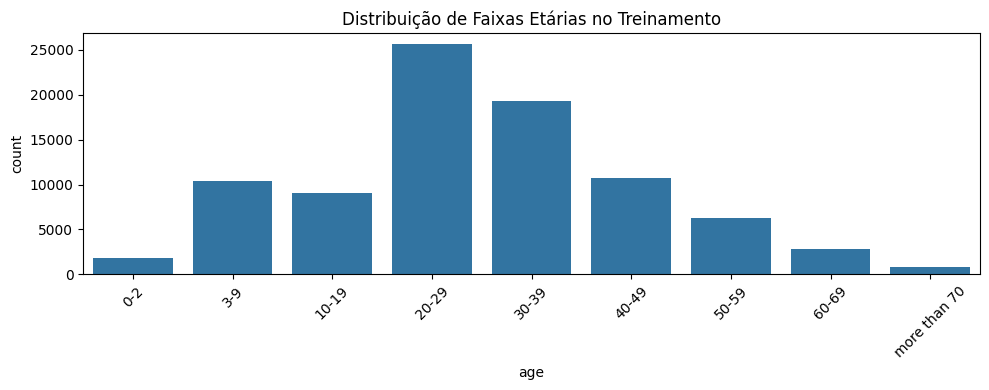

In [ ]:
# Distribuição das faixas etárias

# Ordenar faixas etátias
ordered_ages = ["0-2", "3-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "more than 70"]

plt.figure(figsize=(10, 4))
sns.countplot(data=train_df, x='age', order=ordered_ages)  # ajuste a coluna conforme o nome no CSV
plt.title("Distribuição de Faixas Etárias no Treinamento")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

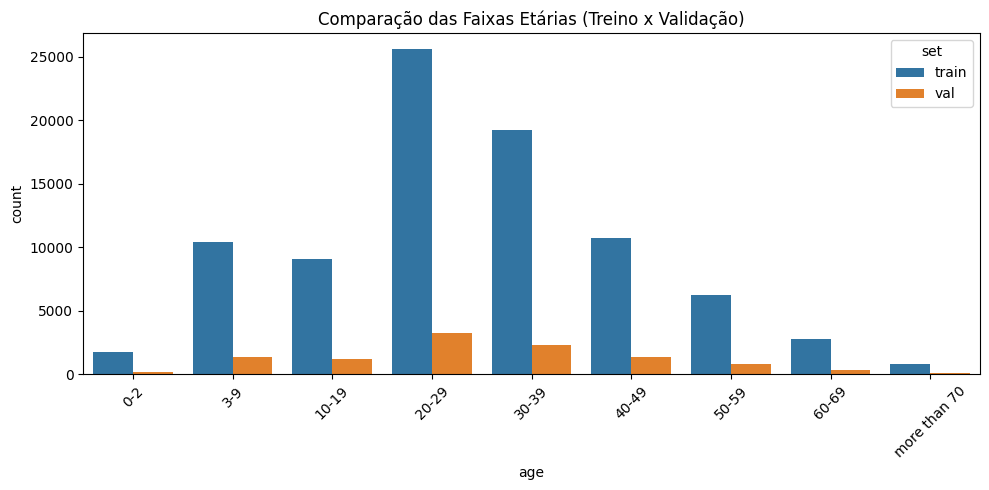

In [ ]:
# Checar a distribuição total das faixas etárias, considerando ambos treino e validação
train_df['set'] = 'train'
val_df['set'] = 'val'
full_df = pd.concat([train_df, val_df])

plt.figure(figsize=(10, 5))
sns.countplot(data=full_df, x='age', hue='set', order=ordered_ages)
plt.title("Comparação das Faixas Etárias (Treino x Validação)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A partir da análise da distribuição por faixa etária, podemos refletir que o modelo tem risco de ficar enviesado para classes mais frequentes, como é o caso de pessoas entre 20-29 anos e 30-39 anos.

O modelo tenderá a prender melhor as classes mais representadas, podendo gerar previsões desbalanceadas.

<Axes: xlabel='age', ylabel='count'>

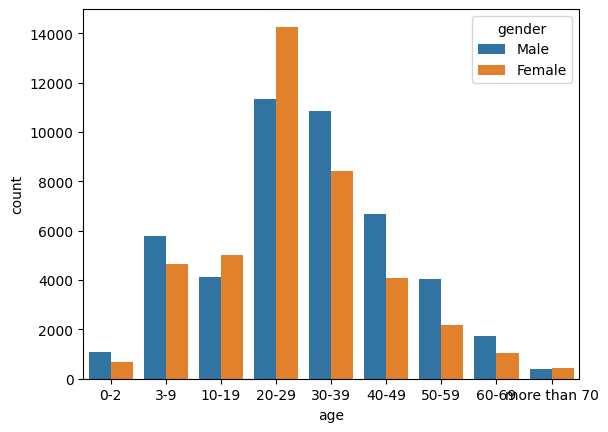

In [ ]:
# Se cruzarmos com os dados de gênero, podemos ver que analisar se este desbalanceamento está relacionado com gênero.

sns.countplot(data=train_df, x='age', hue='gender', order=ordered_ages)

O gráfico final mostra que felizmente a distribuição Male/Female está razoavelmente equilibrada dentro de cada faixa etária. Embora 20-29 ainda seja a maior quantidade, inclusive mais mulheres que homens (!), esse excesso não necessariamente indica um viés de gênero.